# Exercise: Bayesian estimation – first try

Suppose we want to measure the intensity $λ$ of a light source by counting the number of photons, n, detected in a certain time interval. We assume that n ∼ Poisson($λ$)

Given $n = 10$ what is the estimate of $λ$? $\mathcal{L}(\lambda|n)=\frac{\lambda^{n}\exp(-\lambda)}{n!}$ MLE: $\hat{\lambda} = n = 10$

The MAP in Bayesian estimation gives the same result if the prior is flat -> here – say – between 0 and 100

But if the prior state of knowledge is that we have no idea of the _order of magnitude_ of $λ$ then it can be argued that the cumulative probability of the prior should be flat in $\log λ$ (Why? -> scale-free) implying a PDF inversely proportional to $λ$ meaning posterior PDF $\lambda^{-1}\mathcal{L}(\lambda|n)\propto\lambda^{n-1}\exp(-\lambda)$

Genrally, one can write posterior $P(\lambda|n)\propto\lambda^k \mathcal{L}(\lambda|n)\propto\lambda^{n+k}\exp(-\lambda)$

| prior($\lambda^k$) | MAP|$E(\lambda|n)$(mean)|median|
|------|------|---|
|  $\lambda^0=$ const  |n  |n+1                |n+2/3|
|$\lambda^{-1}=$ const |n-1|n                  |n-1/3($n>0$)|

Note, that the priors we are using are improper, i.e. cannot be normalized

Hint: using the $\Gamma$ function $\int_0^{\infty}{\lambda^n\exp{(-\lambda)}d\lambda=n!}$

First $post(\lambda|n)$ must be normalized, normalization constant is $N=\int_0^{\infty}{\lambda^{n+k}e^{-\lambda}d\lambda=(n+k)!}$. Thus $post(\lambda|n)=\frac{\lambda^{n+k}e^{-\lambda}}{(n+k)!}$ $\Rightarrow E(\lambda|n)=\int_0^{\infty}{\lambda \cdot post(\lambda|n) \cdot d\lambda}=n+k+1$

$\ln{post} = (n+k)\ln \lambda - \lambda$

$\frac{\partial P}{\partial \lambda}=(n+k)\frac{1}{\lambda}-1 =0\Rightarrow \lambda_{MAP}=n+k$


CDF$P(\alpha x) - P(x)=c \Rightarrow P(x)=\ln x \Rightarrow p = \frac{dP}{dx}=\frac{1}{x}$

# Example: normalized Gaussian variables

x ~ $N(\mu|\sigma^2)$, $y = \frac{x-\mu}{\sigma}$, $p(y)=?$

$\frac{\partial y}{\partial x}=\frac{1}{\sigma} \Rightarrow p(y)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}y^2}=N(0,1)$



## calculate convolution: use Fourier-transformation and at the end transform it back

convolution of two gaussian -> gaussian

# Example: Should Dirk Nowitzki play?

Dirk Nowitzki is a German basketball player who has successfully played and is playing (at the time of writing: 2017) in the American NBA league. By now Nowitzki reached an age of 39 which is quite advanced for a professional basketball player. In the season of 2016 he performed very well by NBA standards in view of his successes in 3-point shots, namely having 79 hits in 209 shots (actual numbers). After the first quarter of the current season his perfomance was not as good, only 15 hits in 50 shots (this story is made up by me). If you were the coach of Nowitzki’s team (the Dallas Mavericks) would you let him continue to play in forthcoming matches, or would you leave him out? What does statistics tell you?

We want, of course, consider Nowitzki’s scoring performance as random experiment. Hitting or not-hitting is obviously a Bernoulli experiment, following binomial statistics. We are not so much interested in the actual number of hits but rather in Nowitzki’s “hitting probability”, i.e., the probality that he hits. Let’s call it p. The question is then: what p can we expect of Nowitzki in the current season, after he hit rather poorly during the first quarter of the season?

Before let you going into this, first a story about conjugate priors and the Beta distribution . . .

1. Consider Nowitzki’s scoring performance in 2016 and 2017 as separate random experiments, and plot their binomial distributions which describe his “hitting statistics” in these seasons.
2. Looking at Nowitzki’s performance of the current season only: would you let him play? Any hit-rate below 30% is considered below NBA standards.
3. Assuming an uninformative prior (using the β-distribution), plot the posterior distributions of the hitting probabilities p in both cases.
4. Now use the posterior of 2016 as prior for the season 2017. Based on the new combined posterior: would you let Nowitzki play?
5. Any further thoughts on this?

Bernoulli: $B(k|p,n)=\binom{n}{k} p^k (1-p)^{n-k}$

Beta: $\beta(p|\alpha, \beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}p^{\alpha-1}(1-p)^{\beta-1}$, mode $=\frac{\alpha-1}{\alpha+\beta-2}$, mean $=\frac{\alpha}{\alpha+\beta}$ -> Laplace rule of succession

here prior: Beta distribution of $\alpha=\beta=1 \Rightarrow U(0,1)$ because I'm a coach who knows nothing about him and we expect in a simple way. But since he plays in NBA, it is also reasonable to design a beta distribution ~ (0.35+-0.1)

(For coin we believe a sharf distribution centered around 0.5, which corresponds to e.g. dbinom(,2000,2000))

here likelihood: Bernoulli(likelihood is always a function of data)

Thus we get the posterior: $P(p|n,k)=\frac{1}{z}p^k(1-p)^{n-k}p^{\alpha-1}(1-p)^{\beta-1}=\frac{1}{z}p^{\alpha+k-1}k(1-p)^{n+\beta-k-1}$ (z is normalization) We say: Beta distribution is conjugate prior of the Bernolli 

$\beta \cdot B$ again a beta distribution -> if more trials still beta distribution, the model would get better(more close to reality)

$\beta(p|\alpha=k+1, \beta=n-k+1) \Rightarrow$ mode $=\frac{k}{n}$, mean $=\frac{1+k}{2+n}$)

$\alpha = \alpha_{prior}+k$ (+Success)

$\beta = \beta_{prior}+(n-k)$ (+Failure)

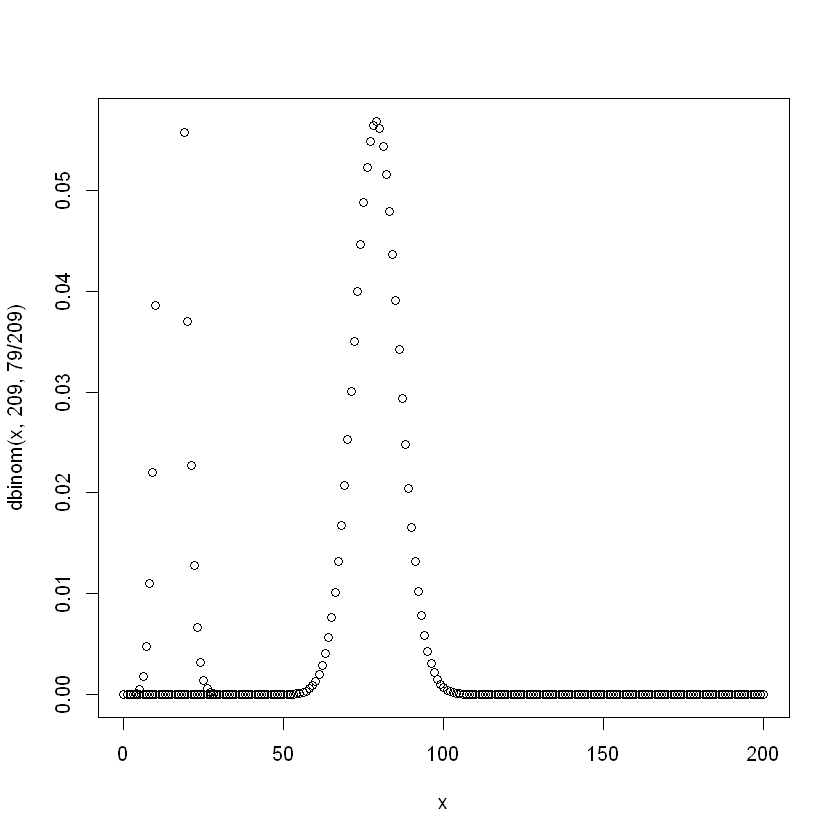

In [15]:
x <- seq(0, 200, by=1)
plot(x, dbinom(x, 209, 79/209))
y <- seq(0,50,by=1)
points(y, dbinom(y, 50, 15/50))

[1] 0.378

[1] 0.3

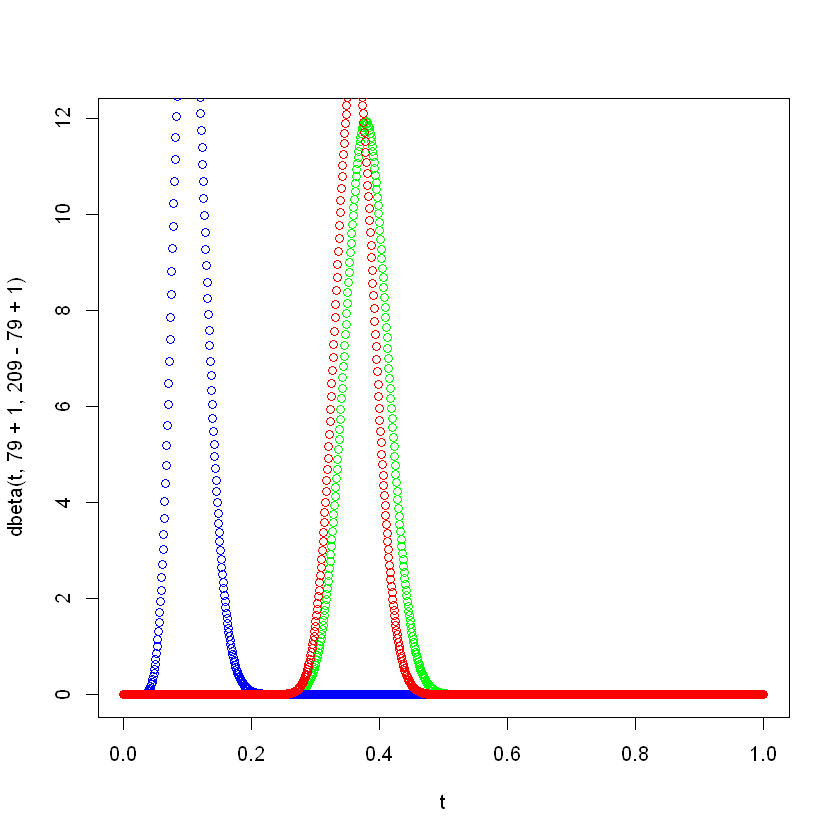

In [22]:
t <- seq(0, 1, by=0.001)
plot(t, dbeta(t,79+1,209-79+1),col="green")#, type = "l")
t[which(dbeta(t,80,131)==max(dbeta(t,80,131)))]
points(t, dbeta(t,15+1,150-15+1),col="blue")#, type = "l")
t[which(dbeta(t,16,36)==max(dbeta(t,16,36)))]
points(t, dbeta(t,15+79,209+50-15-79+1),col="red")

[1] "Mean 2016, hits/tries " "0.37799043062201"      
[1] "Standard deviation    " "7.00990413492661"      


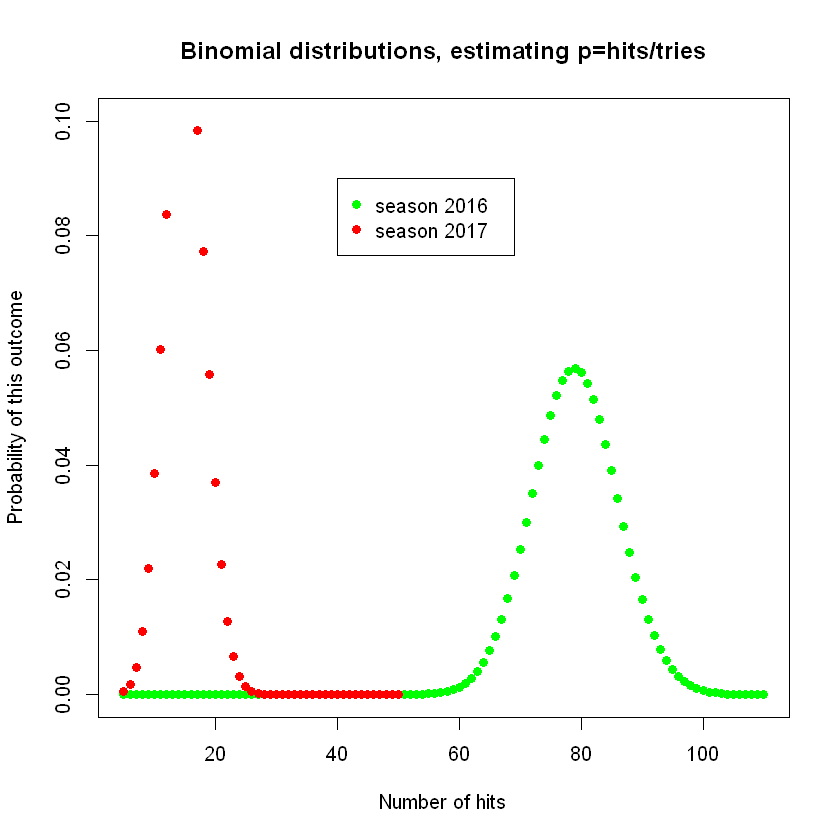

In [27]:
# Dirk Novitzki, age 39 in 2017
# Season 2016, 3-point field goal stats
tries <- 209
hits  <- 79
miss  <- tries-hits

# Hypothetical current season
ctries <- 50
chits  <- 15
cmiss  <- ctries-chits

# assuming binomial statistical behavior
# probability to hit
p <- hits/tries
# variance
v <- tries *  p * (1-p) 
print(c("Mean 2016, hits/tries ", p))
print(c("Standard deviation    ", sqrt(v)))

x <- 5:110            # range of possible outcome for plots
y <- dbinom(x, tries, p)

#graphics.off()
plot(x,y,xlab="Number of hits", ylab="Probability of this outcome",
     main="Binomial distributions, estimating p=hits/tries", ylim=c(0.0, 0.1),
     pch=19, col="green")
cp <- chits/ctries
# prefix "c" is used for "current", i.e., 2017 season
points(5:50,dbinom(5:50, ctries, cp), col="red", pch=19)
legend(40, 0.09, legend=c("season 2016", "season 2017"),
       col=c("green", "red"), pch=19)
dev.new()


nsteps <- 400

plot(0, -1, xlab="Probability p", xlim=c(0.0,1.0), 
     ylab="PDF(Probability)", lty=0, col="green", ylim=c(0.0,13.0))
curve(dbeta(x,hits+1,miss+1), add=T, col="green", n=nsteps, lwd=2)
curve(dbeta(x,chits+1,cmiss+1), add=T, col="red", n=nsteps, lwd=2)
# Bayesian estimate believing that Nowitzki performs as before
curve(dbeta(x, hits+1+chits, miss+1+cmiss), add=T, col="blue", n=nsteps,lwd=2)
lines(0.3*c(1,1), c(0,20), lty=2)
legend(0.5, 12.0, legend=c("Beta(p,79+1,209-79+1) - 2016",
                           "Beta(p,15+1,50 -15+1) - current",
			   "Beta(p,94+1,259-94+1) - combined"),
       col=c("green","red", "blue"), lty=1, cex=0.8)

# TODO: Exercise: confirming MLE relations on parameter uncertainties